#Spam Classification

In [15]:
!pip install nltk
!pip install autocorrect
!pip install wordcloud

In [3]:
!pip install scikit-learn

In [50]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
stemmer=PorterStemmer()
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd
from autocorrect import Speller
spell = Speller()
import re
from tqdm import tqdm

In [5]:
data = pd.read_csv(r'C:\Users\SAYAN\Documents\spam classifier\Spam-Classifier-using-naive-bayes-main\spam.csv')

In [6]:
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [7]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [8]:
data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)

In [9]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
data.rename(columns={'v1': 'labels', 'v2':'messages'},inplace=True)

In [11]:
data.head()

,labels,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


#Lets visulize the spam words

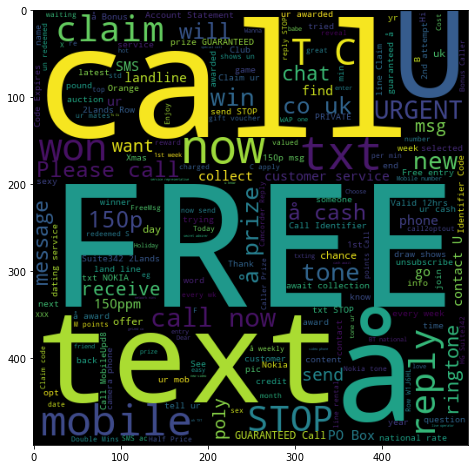

In [22]:
spam_words = ' '.join(list(data[data['labels']=='spam'] ['messages']))
spam_wc = WordCloud(width=500,height=500).generate(spam_words)
plt.figure(figsize=(10,8))
plt.imshow(spam_wc)
plt.show()

#Lets Visualize The ham words

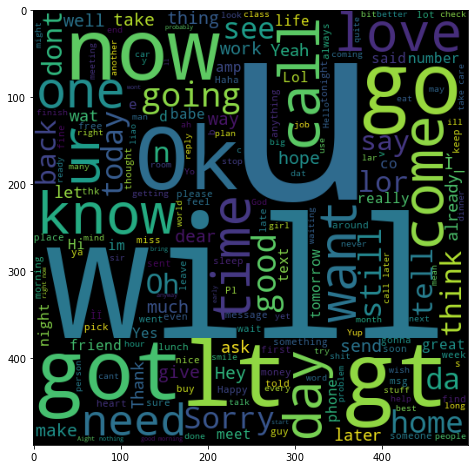

In [23]:
spam_words = ' '.join(list(data[data['labels']=='ham'] ['messages']))
spam_wc = WordCloud(width=500,height=500).generate(spam_words)
plt.figure(figsize=(10,8))
plt.imshow(spam_wc)
plt.show()

#Preprocessing Data

In [27]:
data.head()

,labels,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [29]:
data.shape

(5572, 2)

#Encoding Our labels

In [33]:
data['labels']=data['labels'].apply(lambda x: 1 if x=='spam' else 0)

In [43]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [51]:
# preprocessing the Messages
new_data=[]

for i in tqdm(range(data.shape[0])):
    lines=data.iloc[i,1]
    # removing non alphabatic characters
    lines= re.sub('[^A-Za-z]',' ',lines)
    # lowering the every word
    lines=lines.lower()
    
    # tokenization
    tokenized_lines=word_tokenize(lines)
    
    # removing stop words ,stemming and spell correction
    processed_lines=[]
    for i in tokenized_lines:
        if i not in set(stopwords.words('english')):
            processed_lines.append(spell(stemmer.stem(i)))
            
    final_lines=' '.join(processed_lines)
    new_data.append(final_lines)
  

100%|██████████| 5572/5572 [05:02<00:00, 18.44it/s]


In [52]:
new_data

['go during point crazy avail bugs n great world la e buffet cine got amor wat',
 'ok lar joke if u oni',
 'free entry wki comp win fa cup final tt st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think go usf live around though',
 'frees hey dark week word back like fun still tb ok xxx std chg send rev',
 'even brother like speak treat like aid patent',
 'per request well well oru minnaminungint nurungu vietnam set callertun caller press copy friend callertun',
 'winner value network custom select received prize reward claim call claim code kl valid hour',
 'mobil month u r entity update latest colour mobil camera free call mobil update co free',
 'gon na home soon want talk stuff anymore tonight k cri enough today',
 'six chance win cash pound txt cs send cost p day day stand apply reply hl info',
 'urgent week free membership prize jackpot txt word claim c www duk net lccltd box link rw',
 'search right word thank breathe pro

In [53]:
len(new_data)

5572

In [55]:
Y=data['labels']
Y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: labels, Length: 5572, dtype: int64

In [56]:
Y.value_counts()

0    4825
1     747
Name: labels, dtype: int64

#Splitting the data into training and testing

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(new_data,Y,test_size=0.25)

In [59]:
X_train

['fuck cedar key fuck come anyway tho',
 'tell bad character u dot lik tri chang lt gt add tat new year result wait ur reply frank good more',
 'per request well well oru minnaminungint nurungu vietnam set callertun caller press copy friend callertun',
 'camera quit good mega pixel optic digit doom love holiday safe hope hav good journey happy new year see couple week',
 'ok lor buy wat',
 'would really appreci call need someone talk',
 'when see still hook',
 'dear call tomorrow pl accord',
 'get touch folk wait company txt back name age opt enjoy common p sm',
 'beauty truth express face could seen everyone press heart could understood love one gun ni',
 'way ur home',
 'place want da',
 'hi jon pete ive bin spain recent hav sum diner left bill said u ur rent may interest hav pe around tb jame',
 'cant pick phone right pl send message',
 'ok',
 'see film',
 'frees txt call claim reward hour talk time use phone subscribe gb math inc hr stop txtstop',
 'want new nokia colour phone deli

In [60]:
X_test

['said text one time',
 'ur chance win cash every wk txt action c www movietrivia tv custard x p wk',
 'dont know bring food',
 'u still plumber tape wrench could borrow',
 'come online today night',
 'miya u like day pic look horrible took mo how camp marca thing speak soon serena',
 'believe true injured txt reply g learn truly ama thing blow mind fwd p txt',
 'yep fine ice age',
 'go e normal pilot intro',
 'perhaps much east give account identify tomorrow uni',
 'want get laid tonight want real dog local sent direct ur mob join uk largest dog network texting man nyt ec p msg p',
 'pick ur font u dumb',
 'scream mean shout',
 'abl sleep',
 'ye place town meet exit adult single uk txt chat p msg',
 'ok mani buy',
 'much buzz',
 'lead house',
 'fight world east u either win lose bt fighting close u difficult u lose u lose u win u still lose',
 'forward free entry weekly comp send word enter c www textcomp com',
 'mani time told stage use laugh listen aha',
 'believe true injured txt r

In [61]:
Y_train

2875    0
3483    0
7       0
3507    0
3071    0
       ..
2001    0
5507    0
1661    0
2516    0
5201    1
Name: labels, Length: 4179, dtype: int64

In [62]:
Y_test

1150    0
1652    1
1920    0
3171    0
4905    0
       ..
1791    0
774     0
2966    0
4288    0
2766    1
Name: labels, Length: 1393, dtype: int64

#Vectorization using Bag of Words

In [64]:
from sklearn.feature_extraction.text import CountVectorizer #tf_idf
matrix=CountVectorizer()

In [65]:
X_train_vect = matrix.fit_transform(X_train).toarray()
X_test_vect = matrix.transform(X_test).toarray()

In [66]:
X_train_vect

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [67]:
X_test_vect

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [68]:
Y_train

2875    0
3483    0
7       0
3507    0
3071    0
       ..
2001    0
5507    0
1661    0
2516    0
5201    1
Name: labels, Length: 4179, dtype: int64

In [69]:
Y_test

1150    0
1652    1
1920    0
3171    0
4905    0
       ..
1791    0
774     0
2966    0
4288    0
2766    1
Name: labels, Length: 1393, dtype: int64

#Lets Train our Model

In [72]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [73]:
model.fit(X_train_vect, Y_train)

GaussianNB()

In [74]:
model.classes_

array([0, 1], dtype=int64)

In [75]:
Y_pred=model.predict(X_test_vect)

In [76]:
Y_pred

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [77]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [78]:
accuracy_score(Y_test, Y_pred)*100

85.78607322325915

In [80]:
confusion_matrix(Y_test, Y_pred)

array([[1038,  175],
       [  23,  157]], dtype=int64)